In [9]:
from armageddon import solver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
from armageddon import findstrengthradius, plot_against

##   Extension 1

Here is the brief introduction and several examples for extentsion question 1.

The function we created in the first place is `create_tabular_density`. The input is a path to the tabular data with `type` : `str`. We simply read the input csv file and split it into two `list` X and Y. Then we define a sub function called `tabular_density`, which is used to calculate the atomosphere density given different altitudes. Finally we take the sub function `tabular_density` as the output of the function `create_tabular_density`.

The interpolation strategy we choose in `tabular_density`  is just piece-wise linear interpolation bewteen two points in tabular file. Let $(x_{i-1},y_{i-1}), (x_{i},y_{i})$ be ordered pairs of data points, then the polynomial function we interpolate on this interval is defined as
$$ p_{i}(x) = y_{i-1} + \frac{(y_{i}-y_{i-1})\cdot (x-x_{i-1})}{(x_{i}-x_{i-1})},i = 1,2,3,4,...,n$$

For each interval, the error is bounded by
$$|R_{i}| \leq \frac{(x_{i}- x_{i-1})^2}{8} \cdot max |f''(x)|, i =1,2,3,...n$$

Where $f$ is the actual function.



#### Examples for Extension 1

In [2]:
rhoa = solver.Planet().create_tabular_density('resources/AltitudeDensityTable.csv')

In [3]:
rhoa(4.0600000000000000e+03 )

0.81434604

#### Load data and compare our function values with the actual one

In [4]:
def load_data(file):
    X = []
    Y = []
    data = pd.read_csv(file)
    for i in data[data.keys()[0]]:
        temp = i.split()
        X.append(eval(temp[0]))
        Y.append(eval(temp[1]))
    return X,Y

In [5]:
X,Y = load_data('./resources/AltitudeDensityTable.csv')

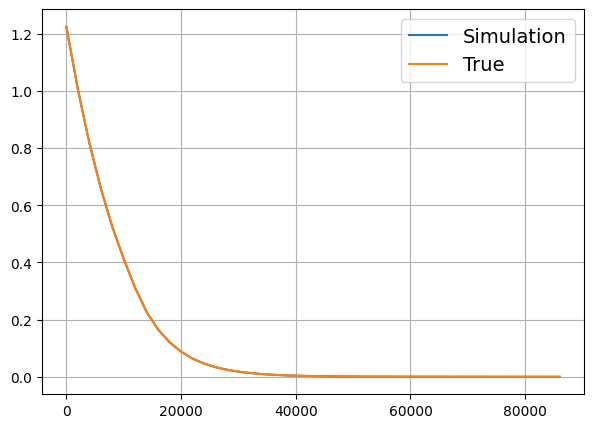

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
ax1.plot(X,[rhoa(i) for i in X],label = 'Simulation')
ax1.plot(X,Y, label = 'True')
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

##   Extension 2

From several observations we can approximately conclude that `radius` influence the scale of maximum air blast energy while `strength ` decides which time point will its maximum be achieved. Hence it is reansonable to only consider the point where `maximum air blast energy` occurs in the graph of `altitude` vs `total energy loss` as a simplification of this curve fitting problem

Consider our curve fitting problem as 
$$
argmin_{r,s} = || f(r,s) - T ||
$$

Where $T$ is a function which returns the acutal point of the maximum energy loss and its corresponding altitude, $f$ is a function returning the point of maximum energy loss and its corresponding altitude in our simulation. Then the distance in two dimensional space defined here is denoted as $$||(x_{0},y_{0}) - (x_{1},y_{1})|| = \sqrt{C\cdot(x_{0} - x_{1})^2 + (y_{0} - y_{1})^2}$$

In general we need to search both parameters such that the error (distance defined above) is set to minimum. By observing multiple plots, we find that for fixed radius $r_{0}$, such that $$error(s) =  || f(r_{0},s) - T || $$ is a convex function with respect to strength.

Plot `strength` vs `error` for a fixed `radius`

![ title](e1.1.png)

Hence for any radius of our interests, we can always find a optimal strength as $s^{*}$, such that $ s^{*} = g(r)$. Therefore, we simplify the problem as $$argmin_{r} = || f(r,g(r)) - T ||$$

From observations, we can also find that $$ error^*(r) = || f(r,g(r)) - T || $$

is also convex with respect to radius.

Plot concerning `radius` and `error*`

![ title](e1.2.png)

In fact, this error fucntion is such well-defined and convex with radius that $f$ can also be the form of $$argmin_{s} = || f(g^{*}(s),s) - T ||$$

As mentioned above, since all error functions are convex, we can apply golden section search method iteratively for both loops to improve efficiency and accuracy.

#### Examples for Extension 2

In [8]:
r, f, s =findstrengthradius(
                density=3300, angle=18.3, velocity=19200,
                data_file='resources/ChelyabinskEnergyAltitude.csv',
                radians=False)

100 1
f: 1329153.63143691 5492976.12460948
x: 38.8146351137604 62.1853648862396

62.1853648862396 1
f: 310393.61710316286 1329153.63143691
x: 24.37072977247918 38.8146351137604

38.8146351137604 1
f: 58003.87152988007 310393.61710316286
x: 15.443905341281225 24.37072977247918

24.37072977247918 1
f: 4878.560159816493 58003.87152988007
x: 9.926824431197948 15.443905341281225

15.443905341281225 1
f: 5939.854558211117 4878.560159816493
x: 6.517080910083277 9.926824431197948

15.443905341281225 6.517080910083277
f: 4878.560159816493 13710.499805886548
x: 9.926824431197948 12.034161820166556

12.034161820166556 6.517080910083277
f: 1282.7321248103945 4878.560159816493
x: 8.624418299051888 9.926824431197948

9.926824431197948 6.517080910083277
f: 1225.9023845147908 1282.7321248103945
x: 7.819487042229337 8.624418299051888

8.624418299051888 6.517080910083277
f: 2897.429203009883 1225.9023845147908
x: 7.322012166905829 7.819487042229337

8.624418299051888 7.322012166905829
f: 1225.9023845147

#### Load data and compare our function values with the actual one

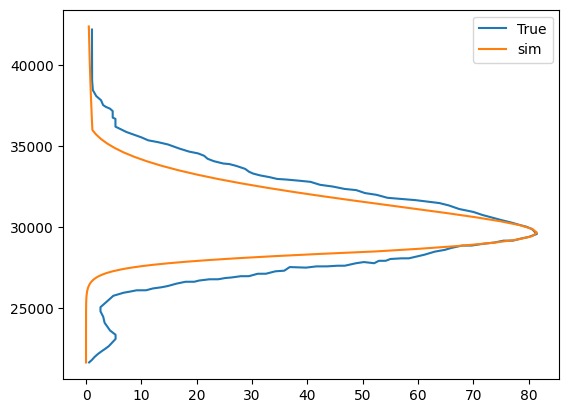

In [10]:
plot_against(r, s)